## Notes, resources, other...

In [1]:
'''
https://stackoverflow.com/questions/22219004/grouping-rows-in-list-in-pandas-groupby

# below creates unique set of keys comprised of first 4 columns (C/A, STATION, UNIT, etc.)
new_set = set(zip(df['C/A'], df['UNIT'], df['SCP'], df['STATION']))

# below works as an initial groupby consolidation
df.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE']).count()
'''

"\nhttps://stackoverflow.com/questions/22219004/grouping-rows-in-list-in-pandas-groupby\n\n# below creates unique set of keys comprised of first 4 columns (C/A, STATION, UNIT, etc.)\nnew_set = set(zip(df['C/A'], df['UNIT'], df['SCP'], df['STATION']))\n\n# below works as an initial groupby consolidation\ndf.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE']).count()\n"

#### Read files into df

In [2]:
import pandas as pd
txt_docs_list = ['turnstile_160409.txt', 'turnstile_180310.txt', 'turnstile_180317.txt',
                 'turnstile_180324.txt', 'turnstile_180331.txt', 'turnstile_180407.txt']

df_list = []
for each in range(1):
    df_list.append(pd.read_csv(txt_docs_list[each]))
    
df = pd.concat(df_list)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194516 entries, 0 to 194515
Data columns (total 11 columns):
C/A                                                                     194516 non-null object
UNIT                                                                    194516 non-null object
SCP                                                                     194516 non-null object
STATION                                                                 194516 non-null object
LINENAME                                                                194516 non-null object
DIVISION                                                                194516 non-null object
DATE                                                                    194516 non-null object
TIME                                                                    194516 non-null object
DESC                                                                    194516 non-null object
ENTRIES                           

#### clean up formatting of data
- strip, astype, other???

In [3]:
# Strip column headings
df.columns = df.columns.str.strip()
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

#### create 'turnstile' - unique column for counting entries / exits
 - could use groupby
 - could avoid groupby, then sort by dates, then build list for unique vals in each date...
 - could use groupby then .apply(list) to compress the values down into a list entry in a new column <-- Yes

In [4]:
df['turnstile'] = df['C/A'] + '_' + df['UNIT'] + '_' + df['SCP'] + '_' + df['STATION']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194516 entries, 0 to 194515
Data columns (total 12 columns):
C/A          194516 non-null object
UNIT         194516 non-null object
SCP          194516 non-null object
STATION      194516 non-null object
LINENAME     194516 non-null object
DIVISION     194516 non-null object
DATE         194516 non-null object
TIME         194516 non-null object
DESC         194516 non-null object
ENTRIES      194516 non-null int64
EXITS        194516 non-null int64
turnstile    194516 non-null object
dtypes: int64(2), object(10)
memory usage: 17.8+ MB


In [5]:
# Convert data types to reduce file size
df['C/A'] = df['C/A'].astype('category')
df['DIVISION'] = df['DIVISION'].astype('category')
df['UNIT'] = df['UNIT'].astype('category')
df['ENTRIES'] = df['ENTRIES'].astype('int32')
df['EXITS'] = df['EXITS'].astype('int32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194516 entries, 0 to 194515
Data columns (total 12 columns):
C/A          194516 non-null category
UNIT         194516 non-null category
SCP          194516 non-null object
STATION      194516 non-null object
LINENAME     194516 non-null object
DIVISION     194516 non-null category
DATE         194516 non-null object
TIME         194516 non-null object
DESC         194516 non-null object
ENTRIES      194516 non-null int32
EXITS        194516 non-null int32
turnstile    194516 non-null object
dtypes: category(3), int32(2), object(7)
memory usage: 12.8+ MB


#### create datetime formatted column from 'DATE' and 'TIME'

In [6]:
df['datetime'] = df['DATE'] + ' ' + df['TIME']
df['datetime'] = pd.to_datetime(df['datetime'], format='%m/%d/%Y %H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194516 entries, 0 to 194515
Data columns (total 13 columns):
C/A          194516 non-null category
UNIT         194516 non-null category
SCP          194516 non-null object
STATION      194516 non-null object
LINENAME     194516 non-null object
DIVISION     194516 non-null category
DATE         194516 non-null object
TIME         194516 non-null object
DESC         194516 non-null object
ENTRIES      194516 non-null int32
EXITS        194516 non-null int32
turnstile    194516 non-null object
datetime     194516 non-null datetime64[ns]
dtypes: category(3), datetime64[ns](1), int32(2), object(7)
memory usage: 14.3+ MB


### Build list for each count within day.
- will eventually need to break out for recorded interval, but start here
- after recorded interval, build out on hourly basis

In [7]:
# apply list of count recordings to values recorded within each day
entries_list = list(df.groupby(['turnstile', 'DATE'])['ENTRIES'].apply(list))
exits_list = list(df.groupby(['turnstile', 'DATE'])['EXITS'].apply(list))
len(entries_list)

32125

In [27]:
# below just to visualize
#type(df.groupby(['turnstile', 'DATE'])['ENTRIES'].apply(list))

pandas.core.series.Series

In [10]:
# use above list to generate single integer count value for each day
# count value will not necessarilly be accurate due to roll-over counts

entries_count = []
for en in entries_list:
    entries_count.append(en[-1] - en[0])

exits_count = []
for ex in exits_list:
    exits_count.append(ex[-1] - ex[0])
    
entries_count[:30000:300] # confirms it works...

[646,
 1418,
 1487,
 2681,
 906,
 372,
 257,
 14,
 1924,
 1055,
 1448,
 1348,
 1576,
 336,
 670,
 2401,
 1820,
 2451,
 917,
 1789,
 389,
 249,
 1178,
 2,
 482,
 35,
 3577,
 999,
 1816,
 474,
 1339,
 1629,
 3461,
 1630,
 0,
 3136,
 781,
 192,
 699,
 1026,
 593,
 0,
 1591,
 782,
 2713,
 1378,
 565,
 68,
 408,
 871,
 14,
 2162,
 1250,
 263,
 1218,
 1095,
 0,
 231,
 576,
 7500,
 1428,
 578,
 0,
 1032,
 277,
 389,
 696,
 725,
 330,
 125,
 0,
 3,
 1473,
 2010,
 1032,
 1412,
 68,
 283,
 1862,
 2741,
 1960,
 2932,
 481,
 729,
 386,
 1161,
 -4666,
 2300,
 245,
 428,
 2191,
 1463,
 1099,
 0,
 487,
 0,
 694,
 2243,
 1600,
 0]

Test above list of daily records...

mean: 17909.806723735408
median: 784.0
std: 16553290.817398323


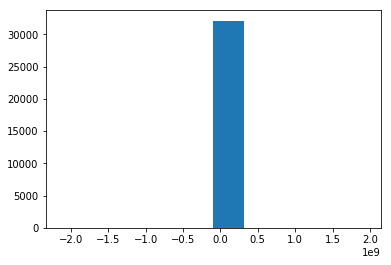

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

print('mean: ' + str(np.mean(entries_count)))
print('median: ' + str(np.median(entries_count)))
print('std: ' + str(np.std(entries_count)))

#below doesn't quite work, but keeping it close for reference...
'''
entries_dict = defaultdict(int)
for k in entries_count:
    entries_dict[k] += 1

    
pos = np.arange(len(entries_dict.keys()))
width = 1.0     # gives histogram aspect to the bar diagram

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(entries_dict.keys())
    
plt.bar(list(entries_dict.keys()), entries_dict.values())
plt.show()
'''

plt.hist(entries_count)
plt.show()

#### How to confirm the counts are currect???
- option 1: eliminate row if list contains a 0 or counts through zero
- option 2: eliminate row if returns (-) value
- option 3: determine max count for the counters and look for values approaching max, this also requires confirming that max count is same across all turnstiles)
- option 4: identify the 'reset' value / max count within the list and work with it
- option 5: ...?

### Rebuild the df with entry/exit counts
- df should include: 'turnstile', 'DATE', 'TIME', 'datetime', 'entries_count', 'exits_count'

In [14]:
# now build the appropriate df from original data ('unit')
## separate df that returns only same # of rows as this series (basically agg'd by turnstile & DATE) (32,125 rows)

df2 = df.groupby(['turnstile', 'DATE']).count() #df2 already exists above
df2['entries_list'] = entries_list
df2['exits_list'] = exits_list
df2['entries_count'] = entries_count
df2['exits_count'] = exits_count
#df2.reset_index()

type(df2.head())




pandas.core.frame.DataFrame